In [1]:
import pandas as pd
import numpy as np
from utils.utils import load_all_games_csv, get_teams
from matplotlib import pyplot as plt


# Travel Distance Analysis
This notebook will examine the relationship between travel distance and the probability of a given team winning.

## Get all Games

In [2]:
all_games = load_all_games_csv('../data/gameinfo_cleaned.csv')

/Users/lancehendricks/Documents/College Coding/ML/Elo Ratings/src/utils/utils.py:18: DtypeWarning: Columns (10,11,13,17,19,21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  all_games = pd.read_csv(filename)


## Win % vs Travel Distance

Text(0.5, 1.0, 'Win % vs Distance Traveled')

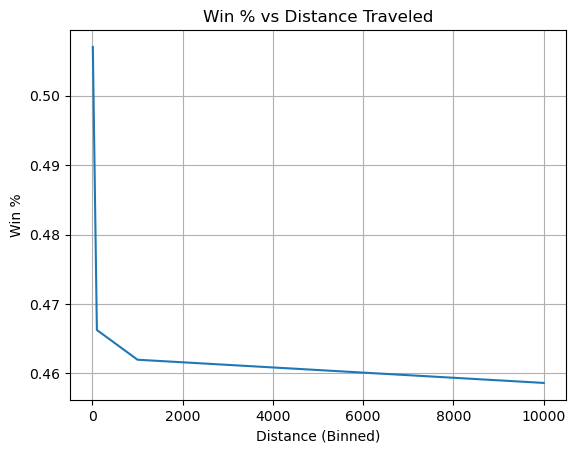

In [5]:
# Bin travel distance logarithmically
bins = pd.Series([10**x for x in range(1,5)])
# Get bin for each row
all_games['visdistancebin'] = all_games['visdistancetraveled'].apply(lambda x: bins[x < bins].min())

# Get travel dists for away games - ignore home games, since they are always 0 and may be confused with home field advantage

dist_stats = all_games.groupby(by='visdistancebin').agg({'homewon':lambda x:(1-x).sum(), 'visteam':'count'}).rename(columns={'homewon':'Wins', 'visteam':'Games'})

dist_stats['Win %'] = dist_stats['Wins'] / dist_stats['Games']

plt.plot(dist_stats.index, dist_stats['Win %'])
plt.grid()
plt.xlabel('Distance (Binned)')
plt.ylabel('Win %')
plt.title('Win % vs Distance Traveled')